# sqlalchemy-challenge
    by Diane Scherpereel 
    October 2019

In [1]:
# Import Matplotlib and associated items
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as pyplot

In [2]:
# Import other Dependencies
import datetime as dt
import numpy as np
import pandas as pd

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

# Exploratory Climate Analysis

In [9]:
# Designed a query to retrieve the last 12 months of precipitation data using ALL data
all_data = pd.read_sql("SELECT date, prcp AS 'precipitation' \
FROM Measurement WHERE date >= '2016-08-23'", conn)
# Preview the Data
all_data.head()


,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


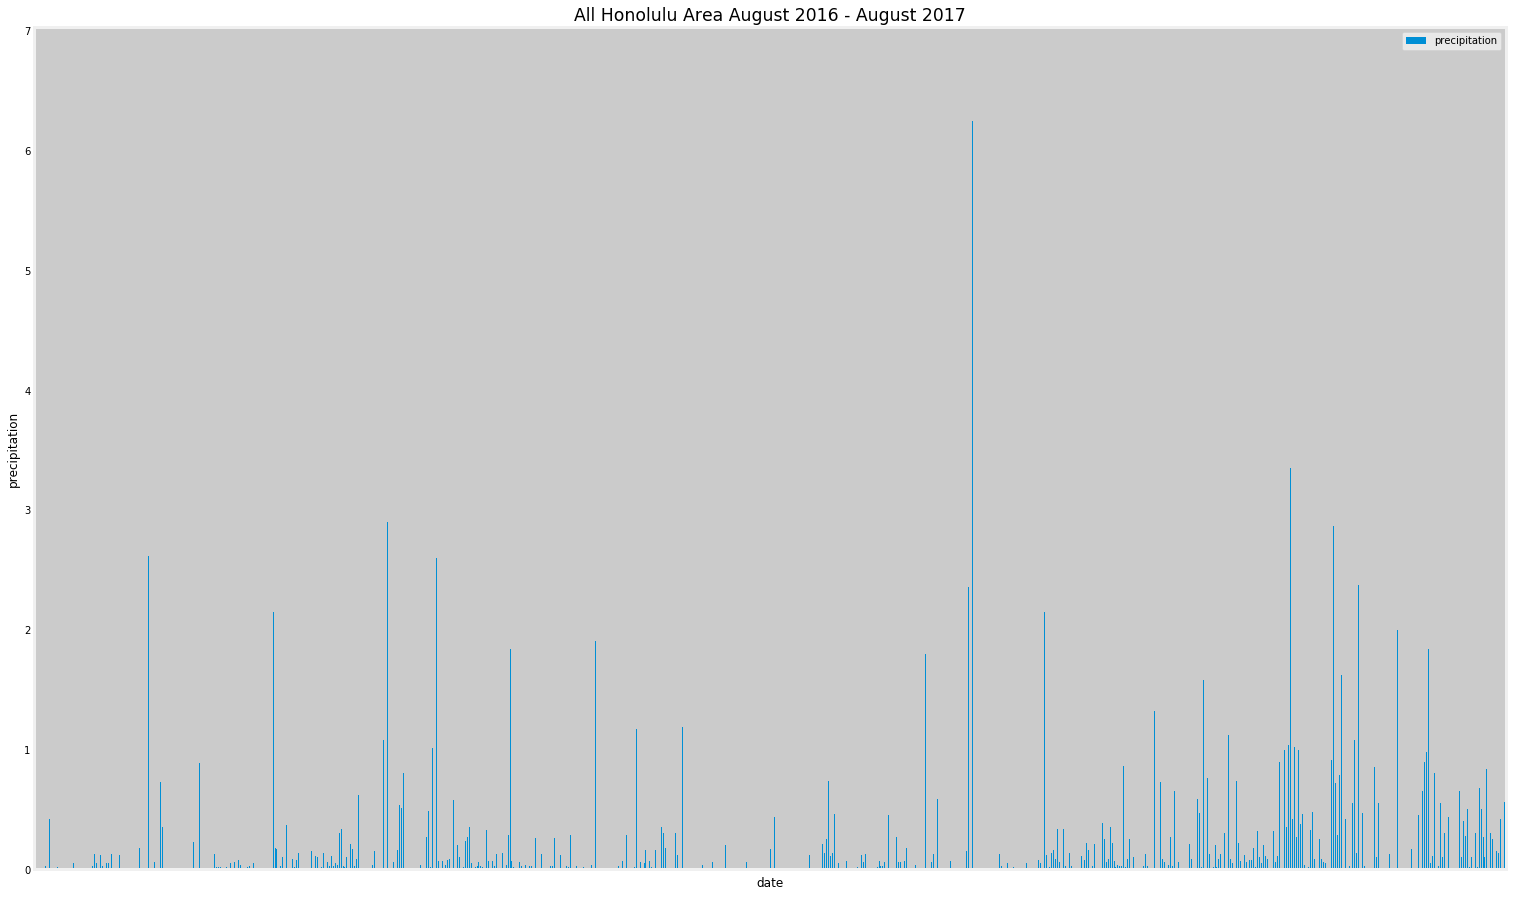

In [10]:
# Plot the data
xlabels = ('')
ax = all_data.plot.bar(x='date', y='precipitation')
ax.set_title("All Honolulu Area August 2016 - August 2017", fontsize='xx-large')
ax.set_ylabel("precipitation")
ax.set_xticklabels(xlabels)
fig = pyplot.gcf()
fig.set_size_inches(23.5, 15.5)

In [11]:
# Summary statistics for all the data
all_data.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# The charge was to: Design a query to retrieve the last 12 months of precipitation data 
# and plot the results.
# I noticed we have data from more than one station.
# How many stations are there in the last 12 months of data? This shows 7.
data_test = engine.execute("SELECT DISTINCT station FROM Measurement \
WHERE date >= '2016-08-23'")
for station in data_test:
    print(station)
    

('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00519523',)
('USC00519281',)
('USC00516128',)


I decided to plot each of the 7 stations over the last year so I can decide which is the least rainy place to go visit.


# Station USC00519397 Waikiki
date & precipitation for most recent year of data

In [13]:
# Station USC00519397 WAIKIKI
date_precipitation_397 = pd.read_sql("SELECT date, prcp AS 'precipitation' \
FROM Measurement WHERE station = 'USC00519397' AND date >= '2016-08-23'", conn)

# Preview the Data
date_precipitation_397.head()

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


[]

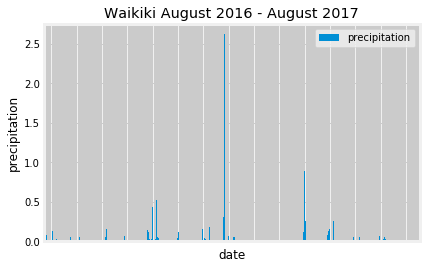

In [14]:
# Create a bar graph to show the precipation by date
# Station USC00519397 WAIKIKI
xlabels = ('')
ax = date_precipitation_397.plot.bar(x='date', y='precipitation', rot = 45)
ax.set_title("Waikiki August 2016 - August 2017")
ax.set_ylabel("precipitation")
ax.set_xticklabels(xlabels)

In [15]:
# Find the summary statistics for Waikiki August 2016-August 2017
summary_statistics_waikiki = pd.read_sql("SELECT MAX(prcp) AS 'maximum_precipitation', \
MIN(prcp) AS 'minimum_precipitation', \
AVG(prcp) AS 'average_precipitation', \
COUNT(prcp) AS 'count' \
FROM Measurement \
WHERE station = 'USC00519397' AND date >= '2016-08-23'", conn)
summary_statistics_waikiki

,maximum_precipitation,minimum_precipitation,average_precipitation,count
0,2.62,0.0,0.044819,359


In [16]:
# Find a date on which the minimum precipitation for Waikiki occurred in the last year
# This will help me decide what time of year I want to go on the trip.
min_data_precipitation_397 = pd.read_sql("SELECT date, MIN(prcp) AS 'minimum_precipitation' \
FROM Measurement WHERE station = 'USC00519397' AND date >= '2016-08-23'", conn)
min_data_precipitation_397

,date,minimum_precipitation
0,2016-08-23,0.0


In [17]:
# Find the date on which the maximum precipitation for Waikiki occurred in the last year
# This will help me decide what time of year I want to avoid.
max_data_precipitation_397 = pd.read_sql("SELECT date, MAX(prcp) AS 'maximum_precipitation' \
FROM Measurement WHERE station = 'USC00519397' AND date >= '2016-08-23'", conn)
max_data_precipitation_397

,date,maximum_precipitation
0,2017-02-12,2.62


# Station USC00514830 Kualoa Ranch Headquarters
date & precipitation for most recent year of data

In [18]:
# Station USC00514830 KUALOA RANCH HEADQUARTERS
date_precipitation_830 = pd.read_sql("SELECT date, prcp AS 'precipitation' \
FROM Measurement WHERE station = 'USC00514830' AND date >= '2016-08-23'", conn)
# Preview the Data
date_precipitation_830.head()

,date,precipitation
0,2016-08-23,0.05
1,2016-08-24,2.28
2,2016-08-25,0.00
3,2016-08-26,0.02
4,2016-08-27,0.02


[]

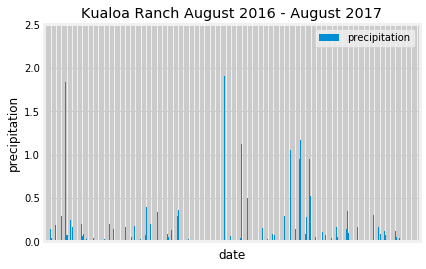

In [19]:
# Create a bar graph to show the precipation by date
# Station USC00514830 KUALOA RANCH HEADQUARTERS
xlabels = ('')
ax = date_precipitation_830.plot.bar(x='date', y= 'precipitation', rot = 45)
ax.set_title("Kualoa Ranch August 2016 - August 2017")
ax.set_ylabel("precipitation")
ax.set_xticklabels(xlabels)

In [20]:
# Find the summary statistics for Kualoa Ranch August 2016-August 2017
summary_statistics_kualoa = pd.read_sql("SELECT MAX(prcp) AS 'maximum_precipitation', \
MIN(prcp) AS 'minimum_precipitation', \
AVG(prcp) AS 'average_precipitation', \
COUNT(prcp) AS 'count' \
FROM Measurement \
WHERE station = 'USC00514830' AND date >= '2016-08-23'", conn)
summary_statistics_kualoa

,maximum_precipitation,minimum_precipitation,average_precipitation,count
0,2.39,0.0,0.125434,265


# Station USC00519523 Waimanalo Experimental Farm
date & precipitation for most recent year of data

In [21]:
# Station USC00519523
date_precipitation_523 = pd.read_sql("SELECT date, prcp AS 'precipitation' \
FROM Measurement WHERE station = 'USC00519523' AND date >= '2016-08-23'", conn)
# Preview the Data
date_precipitation_523.head()

,date,precipitation
0,2016-08-23,0.02
1,2016-08-24,1.22
2,2016-08-25,0.21
3,2016-08-26,0.00
4,2016-08-27,0.00


[]

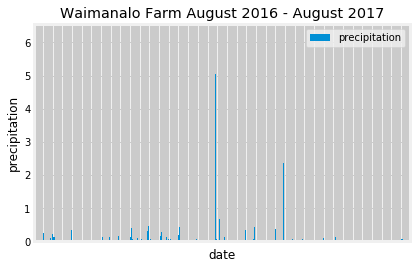

In [22]:
# Create a bar graph to show the precipation by date
# Station USC00519523
xlabels = ('')
ax = date_precipitation_523.plot.bar(x='date', y='precipitation', rot = 45)
ax.set_title("Waimanalo Farm August 2016 - August 2017")
ax.set_ylabel("precipitation")
ax.set_xticklabels(xlabels)

In [23]:
# Find the summary statistics for Waimanalo August 2016-August 2017
summary_statistics_waimanalo = pd.read_sql("SELECT MAX(prcp) AS 'maximum_precipitation', \
MIN(prcp) AS 'minimum_precipitation', \
AVG(prcp) AS 'average_precipitation', \
COUNT(prcp) AS 'count' \
FROM Measurement \
WHERE station = 'USC00519523' AND date >= '2016-08-23'", conn)
summary_statistics_waimanalo
# That was a big rainfall on one day!

,maximum_precipitation,minimum_precipitation,average_precipitation,count
0,6.25,0.0,0.121051,314


# Station USC00516128 Manoa Lyon
date & precipitation for most recent year of data

In [24]:
# Station USC00516128 MANOA LYON ARBORETUM
date_precipitation_128 = pd.read_sql("SELECT date, prcp AS 'precipitation' \
FROM Measurement WHERE station = 'USC00516128' AND date >= '2016-08-23'", conn)
# Preview the Data
date_precipitation_128.head()

,date,precipitation
0,2016-08-23,0.70
1,2016-08-24,1.45
2,2016-08-25,0.11
3,2016-08-27,NaN
4,2016-08-28,2.07


[]

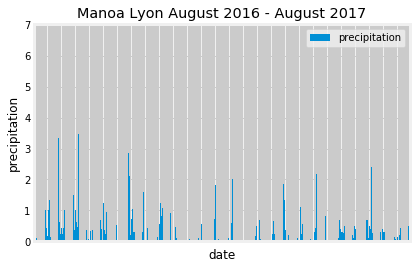

In [25]:
# Create a bar graph to show the precipation by date
# Station USC00516128 MANOA LYON ARBORETUM
xlabels = ('')
ax = date_precipitation_128.plot.bar(x='date', y='precipitation', rot=45)
ax.set_title("Manoa Lyon August 2016 - August 2017")
ax.set_ylabel("precipitation")
ax.set_xticklabels(xlabels)

In [26]:
# Find the summary statistics for Manoa Lyon Arboretum August 2016-August 2017
summary_statistics_manoa = pd.read_sql("SELECT MAX(prcp) AS 'maximum_precipitation', \
MIN(prcp) AS 'minimum_precipitation', \
AVG(prcp) AS 'average_precipitation', \
COUNT(prcp) AS 'count' \
FROM Measurement \
WHERE station = 'USC00516128' AND date >= '2016-08-23'", conn)
summary_statistics_manoa
# This was the largest rainfall in one day from August 2016 to August 2017.

,maximum_precipitation,minimum_precipitation,average_precipitation,count
0,6.7,0.0,0.45064,328


In [27]:
# Find date for max_precipitation
max_precipitation_manoa = pd.read_sql("SELECT date, MAX(prcp) AS 'maximum_precipitation' \
FROM Measurement \
WHERE station = 'USC00516128' AND date >= '2016-08-23'", conn)
max_precipitation_manoa
# It looks like I might not want to go in September!

,date,maximum_precipitation
0,2016-09-14,6.7


In [28]:
# For calculations below, verify cumulative rainfall between May 11-20, 2017
may_rainfall = pd.read_sql("SELECT SUM(prcp) AS 'cumulative rainfall' \
FROM Measurement \
WHERE station = 'USC00516128' AND date >= '2017-05-11' AND date <= '2017-05-20'", conn)
may_rainfall

,cumulative rainfall
0,2.6


# Station USC00513117 Kaneohe
date & precipitation for most recent year of data

In [29]:
# Station USC00513117 KANEOHE
date_precipitation_117 = pd.read_sql("SELECT date, prcp AS 'precipitation' \
FROM Measurement WHERE station = 'USC00513117' AND date >= '2016-08-23'", conn)
# Preview the Data
date_precipitation_117.head()

,date,precipitation
0,2016-08-23,0.15
1,2016-08-24,2.15
2,2016-08-25,0.08
3,2016-08-26,0.03
4,2016-08-27,0.18


[]

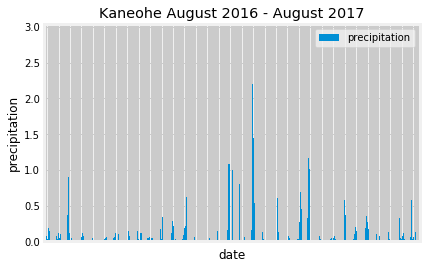

In [30]:
# Create a bar graph to show the precipation by date
# Station USC00513117 KANEOHE
xlabels = ('')
ax = date_precipitation_117.plot.bar(x='date', y='precipitation', rot=45)
ax.set_title("Kaneohe August 2016 - August 2017")
ax.set_ylabel("precipitation")
ax.set_xticklabels(xlabels)

In [31]:
# Find the summary statistics for Kaneohe August 2016-August 2017
summary_statistics_kaneohe = pd.read_sql("SELECT MAX(prcp) AS 'maximum_precipitation', \
MIN(prcp) AS 'minimum_precipitation', \
AVG(prcp) AS 'average_precipitation', \
COUNT(prcp) AS 'count' \
FROM Measurement \
WHERE station = 'USC00513117' AND date >= '2016-08-23'", conn)
summary_statistics_kaneohe

,maximum_precipitation,minimum_precipitation,average_precipitation,count
0,2.9,0.0,0.141429,343


# Station USC00517948 Pearl City
date & precipitation for most recent year of data

In [32]:
# Station USC00517948 PEARL CITY
date_precipitation_948 = pd.read_sql("SELECT date, prcp AS 'precipitation' \
FROM Measurement WHERE station = 'USC00517948' AND date >= '2016-08-23'", conn)
# Preview the Data
date_precipitation_948.head()

,date,precipitation
0,2016-08-23,NaN
1,2016-08-24,NaN
2,2016-08-25,0.00
3,2016-08-26,0.04
4,2016-08-29,NaN


[]

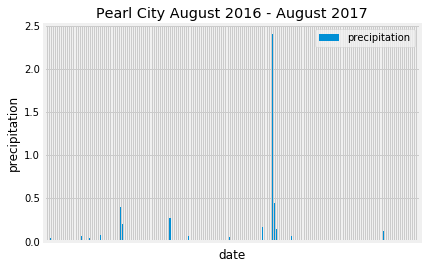

In [33]:
# Create a bar graph to show the precipation by date
# Station USC00517948 PEARL CITY
xlabels =('')
ax = date_precipitation_948.plot.bar(x='date', y='precipitation', rot=45)
ax.set_title("Pearl City August 2016 - August 2017")
ax.set_ylabel("precipitation")
ax.set_xticklabels(xlabels)

In [34]:
# Find the summary statistics for Pearl City August 2016-August 2017
summary_statistics_pearl_city = pd.read_sql("SELECT MAX(prcp) AS 'maximum_precipitation', \
MIN(prcp) AS 'minimum_precipitation', \
AVG(prcp) AS 'average_precipitation', \
COUNT(prcp) AS 'count' \
FROM Measurement \
WHERE station = 'USC00517948' AND date >= '2016-08-23'", conn)
summary_statistics_pearl_city

,maximum_precipitation,minimum_precipitation,average_precipitation,count
0,2.4,0.0,0.0765,60


# Station USC00519281 Waihee
date & precipitation for most recent year of data

In [35]:
# Station USC00519281 WAIHEE
date_precipitation_281 = pd.read_sql("SELECT date, prcp AS 'precipitation' \
FROM Measurement WHERE station = 'USC00519281' AND date >= '2016-08-23'", conn)
# Preview the Data
date_precipitation_281.head()

,date,precipitation
0,2016-08-23,1.79
1,2016-08-24,2.15
2,2016-08-25,0.06
3,2016-08-26,0.01
4,2016-08-27,0.12


[]

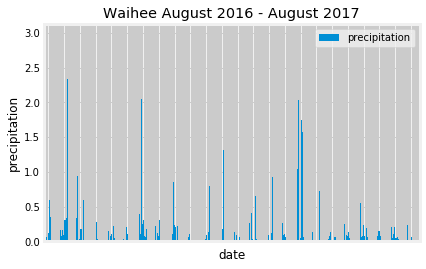

In [36]:
# Create a bar graph to show the precipation by date
# Station USC00519281 WAIHEE
xlabels =('')
ax = date_precipitation_281.plot.bar(x='date', y='precipitation', rot=45)
ax.set_title("Waihee August 2016 - August 2017")
ax.set_ylabel("precipitation")
ax.set_xticklabels(xlabels)

In [37]:
# Find the summary statistics on precipitation for Waihee August 2016-August 2017
summary_statistics_waihee = pd.read_sql("SELECT MAX(prcp) AS 'maximum_precipitation', \
MIN(prcp) AS 'minimum_precipitation', \
AVG(prcp) AS 'average_precipitation', \
COUNT(prcp) AS 'count' \
FROM Measurement \
WHERE station = 'USC00519281' AND date >= '2016-08-23'", conn)
summary_statistics_waihee

,maximum_precipitation,minimum_precipitation,average_precipitation,count
0,2.98,0.0,0.198949,352


In [38]:
# Find the summary statistics on temperature for Waihee August 2016-August 2017
summary_statistics_waihee_temps = pd.read_sql("SELECT MAX(tobs) AS 'maximum_temperature', \
MIN(tobs) AS 'minimum_temperature', \
AVG(tobs) AS 'average_temperature', \
COUNT(tobs) AS 'count' \
FROM Measurement \
WHERE station = 'USC00519281' AND date >= '2016-08-23'", conn)
summary_statistics_waihee_temps

,maximum_temperature,minimum_temperature,average_temperature,count
0,83.0,59.0,73.107955,352


In [39]:
# Find date for the maximum temperature
max_temperature_waihee = pd.read_sql("SELECT date, MAX(tobs) AS 'maximum_temperature' \
FROM Measurement \
WHERE station = 'USC00519281' AND date >= '2016-08-23'", conn)
max_temperature_waihee

,date,maximum_temperature
0,2017-08-06,83.0


In [40]:
# Find date for the miimum temperature
min_temperature_waihee = pd.read_sql("SELECT date, MIN(tobs) AS 'minimum_temperature' \
FROM Measurement \
WHERE station = 'USC00519281' AND date >= '2016-08-23'", conn)
min_temperature_waihee

,date,minimum_temperature
0,2017-02-02,59.0


In [41]:
# Find date for the maximum precipitation
max_precipitation_waihee = pd.read_sql("SELECT date, MAX(prcp) AS 'maximum_precipitation' \
FROM Measurement \
WHERE station = 'USC00519281' AND date >= '2016-08-23'", conn)
max_precipitation_waihee

,date,maximum_precipitation
0,2017-02-12,2.98


In [42]:
# Find date for the minimum precipitation
min_precipitation_waihee = pd.read_sql("SELECT date, MIN(prcp) AS 'minimum_precipitation' \
FROM Measurement \
WHERE station = 'USC00519281' AND date >= '2016-08-23'", conn)
min_precipitation_waihee

,date,minimum_precipitation
0,2016-08-30,0.0


From this data, I think I will avoid February in Waihee since it has the lowest temperature and the highest precipitation amount.

# Their graph for ALL data (for reference). Mine is at the top.


![precipitation](Images/precipitation.png)

# Their summary statistics for ALL data (for reference). Mine is near the top.

![describe](Images/describe.png)

# Number of stations in the dataset

In [43]:
# Designed a query to show how many stations are available in this dataset?
data_stations = engine.execute("SELECT DISTINCT station FROM Measurement")
count = 0
for station in data_stations:
    count += 1
    print(station)
print("There are", count, "stations available in this dataset.")


('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00518838',)
('USC00519523',)
('USC00519281',)
('USC00511918',)
('USC00516128',)
There are 9 stations available in this dataset.


# Most Active Stations

In [44]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

# Maximum Temperature, Minimum Temperature, Average Temperature for the most active station, Waihee (USC00519281), for the last year of data:

In [45]:
# Using the station id from the previous query('USC00519281' which is Waihee), 
# calculate the lowest temperature recorded, highest temperature recorded, 
# and average temperature of the most active station.
# Calculated based on the last year of data only:

temps_of_most_active_station = pd.read_sql("SELECT MAX(tobs) AS 'maximum_temperature', \
MIN(tobs) AS 'minimum_temperature', \
AVG(tobs) AS 'average_temperature' \
FROM Measurement \
WHERE station = 'USC00519281' AND date >= '2016-08-23'", conn)
temps_of_most_active_station

,maximum_temperature,minimum_temperature,average_temperature
0,83.0,59.0,73.107955


# Maximum Temperature, Minimum Temperature, Average Temperature for the most active station, Waihee (USC00519281), including all data:

In [46]:
# Using the station id from the previous query('USC00519281' which is Waihee), 
# calculate the lowest temperature recorded, highest temperature recorded, 
# and average temperature of the most active station.
# Calculated based on all the data:

temps_of_most_active_station = pd.read_sql("SELECT MAX(tobs) AS 'maximum_temperature', \
MIN(tobs) AS 'minimum_temperature', \
AVG(tobs) AS 'average_temperature' \
FROM Measurement \
WHERE station = 'USC00519281'", conn)
temps_of_most_active_station

,maximum_temperature,minimum_temperature,average_temperature
0,85.0,54.0,71.663781


# Waihee Temperature Observations 
# August 2016 to August 2017

In [47]:
# Choose the station with the highest number of temperature observations, 
# which is Waihee (USC00519281).
# Query the last 12 months of temperature observation data for this station

waihee_temps_last_12_months = pd.read_sql("SELECT date, tobs AS 'Temperature Observations' \
FROM Measurement \
WHERE station = 'USC00519281' AND date >= '2016-08-23'", conn)
waihee_temps_last_12_months.head()

,date,Temperature Observations
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


Text(0.5, 1.05, 'Waihee: August 2016-August 2017')

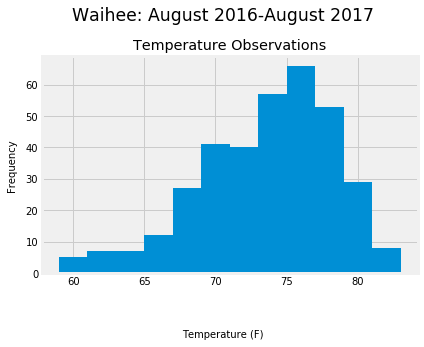

In [48]:
# Plot the results as a histogram using 12 bins and adding a title and x and y labels
fig, axes = pyplot.subplots(sharey=True)
waihee_temps_last_12_months.hist(bins=12, ax=axes)
fig.text(0.5, -0.1, 'Temperature (F)', ha='center')
fig.text(0, 0.5, 'Frequency', va='center', rotation='vertical')
pyplot.suptitle('Waihee: August 2016-August 2017', x=0.5, y=1.05, ha='center', fontsize='xx-large')

# Their histogram (for reference).

![precipitation](Images/station-histogram.png)

# Optional Challenge Assignments

## Temperature Analysis II
### Calculate and plot the minimum, average, and maximum temperatures from last year on the dates of my trip.

In [49]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()


In [50]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# For a trip from May 11 - May 20, using 2017 data
# printing the mininum temperature, the average temperature, and the maximum temperature

print(calc_temps('2017-05-11', '2017-05-20'))

# These numbers are also confirmed by my Flask API

[(68.0, 74.89090909090909, 79.0)]


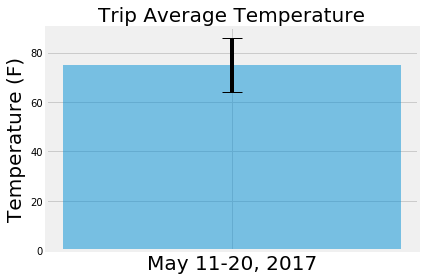

In [51]:
# Plot the results as a bar chart using average temperature for the y value
# and the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

min = 68
mean = 74.89
max = 79

x_pos = np.arange(1)
label = ['May 11-20, 2017']

# Build the plot
fig, ax = pyplot.subplots()
ax.bar(x_pos, mean, yerr=max-min, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Temperature (F)', fontsize=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(label, fontsize=20)
ax.set_title('Trip Average Temperature', fontsize=20)
ax.yaxis.grid(True)

# Use tight layout and show the bar graph
pyplot.tight_layout()
pyplot.show()

## Daily Rainfall Average

In [52]:
# Calculate the total amount of rainfall per weather station for your trip dates 
# using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list 
# the station, name, latitude, longitude, and elevation

sel = [Measurement.station, Station.name, Station.latitude, Station.longitude, \
       Station.elevation, func.sum(Measurement.prcp)]

trip_rainfall = session.query(*sel).filter(Measurement.station == Station.station).\
    filter(Measurement.date >= '2017-05-11').filter(Measurement.date <= '2017-05-20').\
    group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()

#Checked the data here, but put it into a DataFrame below
#trip_rainfall

In [53]:
# Put the data into a DataFrame
trip_rainfall_df = pd.DataFrame(trip_rainfall, columns \
    =['Station Number','Station Name', 'Latitude', 'Longitude', \
      'Elevation', 'Cumulative Rainfall'])
trip_rainfall_df

,Station Number,Station Name,Latitude,Longitude,Elevation,Cumulative Rainfall
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,2.60
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.78
2,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.52
3,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.38
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.23
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.08


To make sure the session.query was giving me the correct output, I verified above,
under my Manoa Lyon Arboretum station calculations, that the cumulative rainfall
between May 11-20, 2017 is indeed 2.6.


## Daily Normal Temperatures

In [54]:
# Define a function (daily_normals) to calculate the minimun, average, and maximum
# temperature for all the data points with that date.
def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    

In [55]:
# For the dates of my trip (May 11-20), calculate the daily normals
dates = ['05-11','05-12','05-13','05-14','05-15','05-16','05-17','05-18','05-19','05-20']
normals = []

for date in dates:
    for temperature in daily_normals(date):
        normals.append(temperature)
print(normals)


[(65.0, 73.61111111111111, 79.0), (65.0, 73.13793103448276, 79.0), (67.0, 73.14285714285714, 79.0), (63.0, 73.89285714285714, 80.0), (63.0, 73.69090909090909, 79.0), (68.0, 74.37931034482759, 80.0), (68.0, 74.45, 79.0), (68.0, 74.10714285714286, 82.0), (65.0, 73.80701754385964, 79.0), (68.0, 73.89655172413794, 79.0)]


In [56]:
# Load the previous query results into a Pandas DataFrame
normals_df = pd.DataFrame(normals, columns = ['Minimum Temperature', 'Average Temperature', 'Maximum Temperature'])
normals_df


,Minimum Temperature,Average Temperature,Maximum Temperature
0,65.0,73.611111,79.0
1,65.0,73.137931,79.0
2,67.0,73.142857,79.0
3,63.0,73.892857,80.0
4,63.0,73.690909,79.0
5,68.0,74.379310,80.0
6,68.0,74.450000,79.0
7,68.0,74.107143,82.0
8,65.0,73.807018,79.0
9,68.0,73.896552,79.0


In [57]:
# Add the `trip_dates` range as the `date` index
normals_df['Date'] = dates
normals_with_dates = normals_df.set_index('Date')
normals_with_dates

,Minimum Temperature,Average Temperature,Maximum Temperature
Date,,,
05-11,65.0,73.611111,79.0
05-12,65.0,73.137931,79.0
05-13,67.0,73.142857,79.0
05-14,63.0,73.892857,80.0
05-15,63.0,73.690909,79.0
05-16,68.0,74.379310,80.0
05-17,68.0,74.450000,79.0
05-18,68.0,74.107143,82.0
05-19,65.0,73.807018,79.0


Text(0, 0.5, 'Temperature (F)')

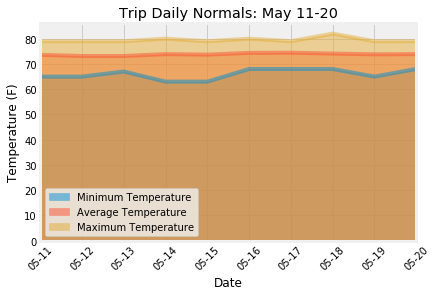

In [58]:
# Plot the daily normals as an area plot with `stacked=False`
#normals_df.reset_index
ax = normals_with_dates.plot.area(stacked=False, rot = 45)
ax.set_title('Trip Daily Normals: May 11-20')
ax.set_ylabel('Temperature (F)')

## Temperature Analysis I

### Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in, for example, June and December?

In [121]:
# Define a function (daily_average) to calculate the average
# temperature for all the data points with that date, and the number of observations.
def daily_average(start_date, end_date):
    """Daily Average.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals: tavg
    
    """
    
    sel = [func.avg(Measurement.tobs), func.count(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) >= start_date).\
        filter(func.strftime("%m-%d", Measurement.date) <= end_date).all()


In [122]:
# Average temperature for JUNE and number of observations
daily_average('06-01','06-30') 

[(74.94411764705882, 1700)]

In [123]:
# Average temperature for DECEMBER and number of observations
daily_average('12-01','12-31') 

[(71.04152933421226, 1517)]

### There is still no built-in stdev function in sqlite. Source: (https://stackoverflow.com/questions/2298339/standard-deviation-for-sqlite)

### Trying to define a function to calculate standard error

In [138]:
# Define function to calculate standard error
'''
def standard_error(daily_avg, count, start_date, end_date):
    selection = [func.sqrt(func.sum((Measurement.tobs - daily_avg)*(Measurement.tobs - daily_avg))/func.count(Measurement.tobs))]
    return session.query(*selection).filter(func.strftime("%m-%d", Measurement.date) >= start_date).\
        filter(func.strftime("%m-%d", Measurement.date) <= end_date).all()
'''
# This didn't work because although "sqrt" is a Python function, sqlite3 has no such function
# For June data from above & using the following: standard_error(74.94411764705882, 1700, '06-01','06-30')
# produced:     OperationalError: (sqlite3.OperationalError) no such function: sqrt

### Trying a different way to calculate standard error: reading the CSV file and putting into pandas

In [181]:
# Read in data from csv file
for_statistics= pd.read_csv('../Instructions/Resources/hawaii_measurements.csv')
for_statistics.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [63]:
# Change the index to the date
for_statistics_with_index = for_statistics.set_index('date')
for_statistics_with_index.head()

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73


In [182]:
# Sort the index to avoid errors
# Then reset the index for the next step below to be able to call on the "date" column
for_statistics_with_index_sorted = for_statistics_with_index.sort_index(inplace=False)
for_statistics_no_index = for_statistics_with_index_sorted.reset_index(inplace=False)
for_statistics_no_index.head()

,date,station,prcp,tobs
0,2010-01-01,USC00519397,0.08,65
1,2010-01-01,USC00518838,0.21,72
2,2010-01-01,USC00519523,0.15,75
3,2010-01-01,USC00519281,0.15,70
4,2010-01-01,USC00511918,0.05,66


In [183]:
# Add a column that extracts just the month
for_statistics_no_index['month'] = [date[5:7] for date in for_statistics_no_index['date']]
for_statistics_no_index.head()

,date,station,prcp,tobs,month
0,2010-01-01,USC00519397,0.08,65,01
1,2010-01-01,USC00518838,0.21,72,01
2,2010-01-01,USC00519523,0.15,75,01
3,2010-01-01,USC00519281,0.15,70,01
4,2010-01-01,USC00511918,0.05,66,01


### Use an unpaired (independent) t-test because June is not a sample from December. Instead these are independent samples. We can use this test if we observe two independent samples from the same or different populations. Source:(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)


In [169]:
# Import scipy for statistics
import scipy
from scipy import stats
from scipy.stats import ttest_ind

### Calculate the statistical difference between June & December data (including all years in data set).

In [186]:
# Collect a list of all June temperature data (all years, all stations) for statistics
all_june_temps = []
for index, row in for_statistics_no_index.iterrows():
    if row['month'] == '06':
        all_june_temps.append(row['tobs'])
# all_june_temps  (without the comment, this prints the full list of June temperatures)

In [187]:
# Collect a list of all December temperature data (all years, all stations) for statistics
all_december_temps = []
for index, row in for_statistics_no_index.iterrows():
    if row['month'] == '12':
        all_december_temps.append(row['tobs'])
# all_december_temps (without the comment, this prints the full list of December temperatures)

In [188]:
stats.describe(all_june_temps)

DescribeResult(nobs=1700, minmax=(64, 85), mean=74.94411764705882, variance=10.610765848422949, skewness=-0.22587667021896127, kurtosis=-0.42295342222600585)

In [189]:
stats.describe(all_december_temps)

DescribeResult(nobs=1517, minmax=(56, 83), mean=71.04152933421226, variance=14.031915337694345, skewness=-0.4050972954211532, kurtosis=0.45781715568357617)

In [190]:
stats.ttest_ind(all_june_temps,all_december_temps)

Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

### Wow! That's a super-small p-value: 3.9 x 10 to the negative 191, indicating that there is a significant difference between the temperatures in June vs. December, but I like both 71 degrees and ~75 degrees! They don't feel "that" different!